In [53]:
from sklearn.datasets import load_breast_cancer

bc= load_breast_cancer()

Dataset Info

In [54]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [55]:
#info of sick or not sick in target
bc.target[234]

1

In [56]:
#shape of target
bc.target.shape

(569,)

In [57]:
bc.data.shape

(569, 30)

Preprocessing

In [58]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc.data,bc.target,test_size=0.2)

In [59]:
print (f"Features=> Train:{X_train.shape} - Test: {X_test.shape}")
print (f"Labels=> Train:{y_train.shape} - Test: {y_test.shape}")


Features=> Train:(455, 30) - Test: (114, 30)
Labels=> Train:(455,) - Test: (114,)


In [60]:
X_train[0]

array([1.425e+01, 2.215e+01, 9.642e+01, 6.457e+02, 1.049e-01, 2.008e-01,
       2.135e-01, 8.653e-02, 1.949e-01, 7.292e-02, 7.036e-01, 1.268e+00,
       5.373e+00, 6.078e+01, 9.407e-03, 7.056e-02, 6.899e-02, 1.848e-02,
       1.700e-02, 6.113e-03, 1.767e+01, 2.951e+01, 1.191e+02, 9.595e+02,
       1.640e-01, 6.247e-01, 6.922e-01, 1.785e-01, 2.844e-01, 1.132e-01])

In [61]:
X_test[0]

array([1.380e+01, 1.579e+01, 9.043e+01, 5.841e+02, 1.007e-01, 1.280e-01,
       7.789e-02, 5.069e-02, 1.662e-01, 6.566e-02, 2.787e-01, 6.205e-01,
       1.957e+00, 2.335e+01, 4.717e-03, 2.065e-02, 1.759e-02, 9.206e-03,
       1.220e-02, 3.130e-03, 1.657e+01, 2.086e+01, 1.103e+02, 8.124e+02,
       1.411e-01, 3.542e-01, 2.779e-01, 1.383e-01, 2.589e-01, 1.030e-01])

In [62]:
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler for custome range
scaler = MinMaxScaler(feature_range=(0,1))
#for MinMaxScaler
#farz bar inke dade Train ra darim(model mitavanad dadeye Train ra bebinad)
#ebteda tamamie adadHAye scaler ra bar asase X_train be dast miavarad
#ba estefade az adadHAye hesab shode anha ra transform mikone be featureHAye jadid ke dar range 0va1 hastand
X_train = scaler.fit_transform(X_train)
#Vali baraye dadehaye test ke az hamin scaler hastand faghat transform mikonim
#chon farz ra bar in migozarim ke dadeye test ra nadarim
#bar asase uon chizi ke ba estefade az dadeye train fit kardam va mohasebe shod faghat transform anjamm beshe
X_test = scaler.transform(X_test)

In [63]:
X_train[0]

array([0.35564362, 0.42069665, 0.36775907, 0.21302227, 0.42016057,
       0.62125882, 0.5002343 , 0.43006958, 0.52822341, 0.50954283,
       0.24220998, 0.25674529, 0.25797798, 0.10081846, 0.23679865,
       0.5130231 , 0.22709019, 0.45183374, 0.17018179, 0.2375667 ,
       0.34649591, 0.46615139, 0.34209871, 0.19030181, 0.60335399,
       0.57672319, 0.5528754 , 0.61340206, 0.30387265, 0.38147711])

In [64]:
X_test[0]

array([0.33362689, 0.2056138 , 0.32590315, 0.1868929 , 0.37853107,
       0.37196082, 0.18249766, 0.25193837, 0.35769459, 0.34842432,
       0.0675409 , 0.07361842, 0.06706533, 0.03090785, 0.07202333,
       0.13817707, 0.05789993, 0.22508557, 0.08059278, 0.10176097,
       0.30736393, 0.23560768, 0.29827183, 0.15414864, 0.43638352,
       0.31248046, 0.22196486, 0.47525773, 0.24328819, 0.31457431])

## Classification


    1.Navie Bayes

In [65]:
#Neveshtane ye Function baraye mohasebeye acc prdi recall va matrix sardargomi
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)
    preci_test = precision_score(y_true=y_test,y_pred=y_pred_test)
    recall_test = recall_score(y_true=y_test,y_pred=y_pred_test)
    confus_matrix = confusion_matrix(y_test,y_pred_test)
    
    print(f"acc Train => {acc_train} - acc Test => {acc_test} - precision=> {preci_test} - recall => {recall_test} ")
    print("Confusion Matrix Test : ")
    print(confus_matrix)
    return acc_train,acc_test,recall_test,preci_test,confus_matrix
   


    


In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [67]:
y_pred_test_gnb = gnb.predict(X_test)
y_pred_train_gnb = gnb.predict(X_train)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb, confus_gnb = calculate_metrics(y_train,y_test,y_pred_train_gnb,y_pred_test_gnb) 

acc Train => 0.9318681318681319 - acc Test => 0.9122807017543859 - precision=> 0.9452054794520548 - recall => 0.92 
Confusion Matrix Test : 
[[35  4]
 [ 6 69]]


    2.KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, algorithm='kd_tree',leaf_size=20)
knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, n_neighbors=6)

In [69]:
y_pred_test_knn = knn.predict(X_test)
y_pred_train_knn = knn.predict(X_train)

acc_train_knn, acc_test_knn, p_knn, r_knn, confus_knn = calculate_metrics(y_train,y_test,y_pred_train_knn,y_pred_test_knn) 

acc Train => 0.978021978021978 - acc Test => 0.956140350877193 - precision=> 0.972972972972973 - recall => 0.96 
Confusion Matrix Test : 
[[37  2]
 [ 3 72]]


    3.Decission Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=256, min_samples_leaf=2,min_samples_split=8,criterion='entropy')
rf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=256, min_samples_leaf=2,
                       min_samples_split=8)

In [84]:
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt, confus_dt = calculate_metrics(y_train,y_test,y_pred_train_dt,y_pred_test_dt) 


acc Train => 0.9846153846153847 - acc Test => 0.9122807017543859 - precision=> 0.9452054794520548 - recall => 0.92 
Confusion Matrix Test : 
[[35  4]
 [ 6 69]]


    3.Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=128, max_depth=32,min_samples_split=4)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=128)

In [89]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf, confus_rf = calculate_metrics(y_train,y_test,y_pred_train_dt,y_pred_test_rf) 

acc Train => 0.9846153846153847 - acc Test => 0.9649122807017544 - precision=> 0.9863013698630136 - recall => 0.96 
Confusion Matrix Test : 
[[38  1]
 [ 3 72]]


    5.SVM

In [90]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(X_train,y_train)



SVC(kernel='poly')

In [91]:
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm, confus_svm = calculate_metrics(y_train,y_test,y_pred_train_svm,y_pred_test_svm) 

acc Train => 0.9846153846153847 - acc Test => 0.9736842105263158 - precision=> 0.9736842105263158 - recall => 0.9866666666666667 
Confusion Matrix Test : 
[[37  2]
 [ 1 74]]


    6.Logestic Regression

In [92]:
#recall kheili khob mide 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [93]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr, confus_lr = calculate_metrics(y_train,y_test,y_pred_train_lr,y_pred_test_lr) 

acc Train => 0.978021978021978 - acc Test => 0.9736842105263158 - precision=> 0.9615384615384616 - recall => 1.0 
Confusion Matrix Test : 
[[36  3]
 [ 0 75]]


    7.ANN

In [97]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=512,activation='relu',solver='adam',batch_size=64)
ann.fit(X_train,y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=512)

In [98]:
y_pred_train_ann = ann.predict(X_train)
y_pred_test_ann = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann, confus_ann = calculate_metrics(y_train,y_test,y_pred_train_ann,y_pred_test_ann) 

acc Train => 0.9824175824175824 - acc Test => 0.9736842105263158 - precision=> 0.9864864864864865 - recall => 0.9733333333333334 
Confusion Matrix Test : 
[[38  1]
 [ 2 73]]


## Comparison

<function matplotlib.pyplot.show(close=None, block=None)>

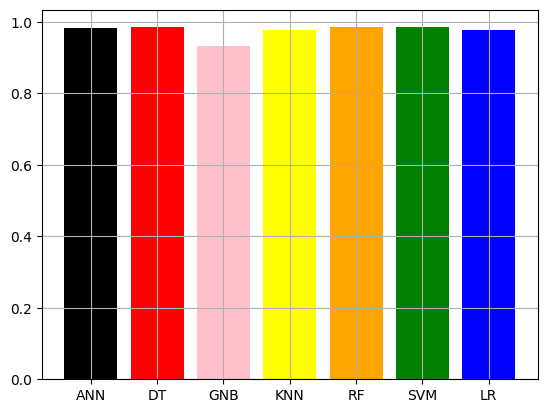

In [103]:
import matplotlib.pyplot as plt

acc_train = [acc_train_ann,acc_train_dt,acc_train_gnb,acc_train_knn,acc_train_rf,acc_train_svm,acc_train_lr]
title = ["ANN","DT","GNB","KNN","RF","SVM","LR"]
color = ["black", "red","pink","yellow","orange","green","blue"]
plt.bar(title,acc_train,color=color)
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

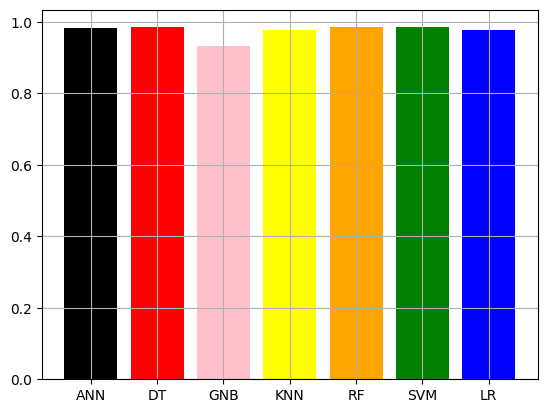

In [104]:
acc_test = [acc_test_ann,acc_test_dt,acc_test_gnb,acc_test_knn,acc_test_rf,acc_test_svm,acc_test_lr]
title = ["ANN","DT","GNB","KNN","RF","SVM","LR"]
color = ["black", "red","pink","yellow","orange","green","blue"]
plt.bar(title,acc_train,color=color)
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

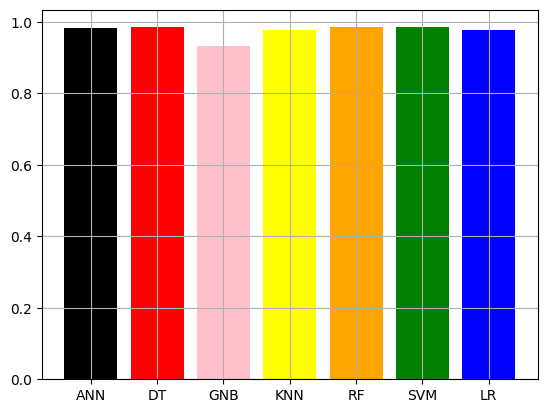

In [105]:
r = [r_ann,r_dt,r_gnb,r_knn,r_rf,r_svm,r_lr]
title = ["ANN","DT","GNB","KNN","RF","SVM","LR"]
color = ["black", "red","pink","yellow","orange","green","blue"]
plt.bar(title,acc_train,color=color)
plt.grid()
plt.show